## Use case 2: Observatory events

In [1]:
import ToyModel as tm

#### Construction of an Observatory object

In [2]:
## An Observatory object is a list of telescopes with some attributes and methods
telescope1 = tm.Telescope(x=0.1, y=0.2, theta=20.)
telescope2 = telescope1.copy(x=0.2, y=0.1)
telescope3 = telescope1.copy(x=-0.3, y=-0.1)
observatory = tm.Observatory(telescope1, telescope2, telescope3, obs_type="my observatory")
## Some attributes of Observatory objects
print("Observatory type:", observatory.obs_type)
print("Number of telescopes:", observatory.N_tel)
print("Type of telescopes:", observatory.tel_type)
print("Aperture of telescopes in degrees:", observatory.tel_apert)
print("Central position of the observatory:", (observatory.x_c, observatory.y_c, observatory.z_c))
## Note: The first input telescope is the reference one for tel_type, tel_apert, etc.,
## even if the observatory is made up of telescopes of different types

Observatory type: my observatory
Number of telescopes: 3
Type of telescopes: MST
Aperture of telescopes in degrees: 8.0
Central position of the observatory: (0.1, 0.2, 0.0)


In [3]:
## More telescopes can be added later
observatory.append(telescope1.copy(x=0., y=0., apert=5., theta=10., az=56.))

Pointing of second telescope: (20.0, 0.0)
Pointing of last telescope: (10.0, 56.0)


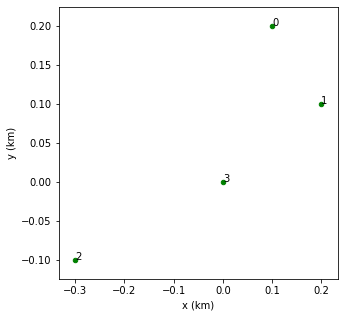

In [4]:
## 2D plot of telescope positions and indexes
observatory.show();
## One can access some telescope through the corresponding index (starting at 0)
print("Pointing of second telescope:", (observatory[1].theta, observatory[1].az))
print("Pointing of last telescope:", (observatory[3].theta, observatory[3].az))

Observatory type: Array25
Number of telescopes: 25
Type of telescopes: MST
Center of the array: (0.2, 0.2, 0.5)


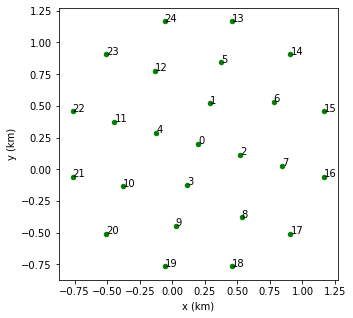

In [5]:
## Constructors for two predefined observatory layouts are available (more to be implemented):
## 1) Circular array of 25 telescopes. By default, a radius of 341 m and MST telescopes pointing at zenith are assumed
#observatory2 = tm.Array25()
## Setting the observatory position (center), radius, telescope pointing and array rotation
observatory2 = tm.Array25(x_c=0.2, y_c=0.2, z_c=0.5, R=1., theta=20., az= 120., rot_angle=15.)
## The type of telescopes of the array can also be modified
#observatory2 = tm.Array25(tel_type='generic', R=1., theta=20., az= 120.)
## Equivalent to
#telescope1 = tm.Telescope(tel_type='generic', theta=30., az= 10.)
#observatory2 = tm.Array25(telescope=telescope1, R=1., theta=20., az= 120.) #theta and az are overwritten
print("Observatory type:", observatory2.obs_type)
print("Number of telescopes:", observatory2.N_tel)
print("Type of telescopes:", observatory2.tel_type)
print("Center of the array:", (observatory2.x_c, observatory2.y_c, observatory2.z_c))
observatory2.show();

Observatory type: Grid
Number of telescopes: 100
Type of telescopes: GridElement
Center of the array: (0.0, 0.0, 0.0)
Telescope detection area in m^2: 40000.00000000001


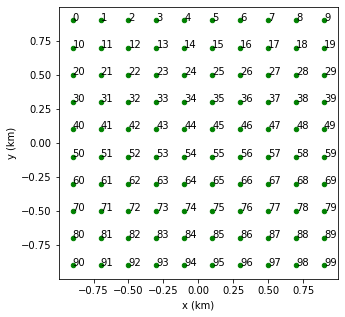

In [6]:
## 2) Rectangular grid of telescopes. By default, a 2x2 km2 grid of 10x10 telescopes of type "GridElement" is assumed
## A GridElement telescope is predifined with 100% efficiency in the 290-430 nm range, 180 degrees aperture around zenith
## and detection area equal to grid cell area
observatory3 = tm.Grid()
print("Observatory type:", observatory3.obs_type)
print("Number of telescopes:", observatory3.N_tel)
print("Type of telescopes:", observatory3.tel_type)
print("Center of the array:", (observatory3.x_c, observatory3.y_c, observatory3.z_c))
print("Telescope detection area in m^2:", observatory3.tel_area)

## Setting grid position, dimensions, granularity and telescope type
## For instance, 1D grid of MST telescopes along the x axis
#observatory3 = tm.Grid(tel_type="MST", theta=20., az= 10., x_c=0.1, y_c=-0.3, size_x=4., size_y=0.1, N_x=10, N_y=1)

observatory3.show();

## Note: A Grid object is generated when calling the "show_distribution" method of shower (see UC3)

In [7]:
## Help on constructors of Observatory objects
#tm.Observatory?
#tm.Array25?
#tm.Grid?
## Help on Observatory objects
#observatory3?

#### Event objects

In [8]:
## An Event object contains a Shower object, an Observatory object as well as lists of Projection and Signal objects
## By default, signals are calculated including both atmospheric transmission and detection efficiency
shower = tm.Shower(x0=0.2, y0=0.1, theta=20., az=45.)
observatory = tm.Array25(R=1., theta=22., az= 45.)
event1 = tm.Event(observatory, shower)
## Equivalent method of Shower
#event1 = shower.Event(observatory)
## Turning off both the atmospheric transmission and detection efficiency, and defining wavelength range
event2 = tm.Event(observatory, shower, atm_trans=False, tel_eff=False)

In [9]:
## The Atmosphere, Track, Profile, Fluorescence and Cherenkov objects contained in the Shower object
# can also be accessed by attributes of Event
event1.track #Equivalent to event1.shower.track
#event1.profile.show();

,x,y,z,t
0,0.225884,0.125884,0.100572,392.335254
1,0.277651,0.177651,0.301716,391.621268
2,0.329419,0.229419,0.502860,390.907282
3,0.381187,0.281187,0.704004,390.193296
4,0.432954,0.332954,0.905148,389.479310
...,...,...,...,...
545,28.439221,28.339221,109.724052,3.212937
546,28.490988,28.390988,109.925196,2.498951
547,28.542756,28.442756,110.126340,1.784965
548,28.594523,28.494523,110.327484,1.070979


In [10]:
## Telescope, Signal and Projection objects are elements of the lists observatory, signals and projections, respectively
signals1 = event1.signals
signals2 = event2.signals
projections = event1.projections
print("Position of sixth telescope:", (observatory[5].x, observatory[5].y, observatory[5].z))
print("Total number of photoelectrons in sixth telescope:", signals1[5].Npe_total_sum)
print("The same but without atmospheric transmission or detection efficiency:", signals2[5].Npe_total_sum)
projections[5]

Position of sixth telescope: (0.0, 0.6666666666666666, 0.0)
Total number of photoelectrons in sixth telescope: 13.850643056357026
The same but without atmospheric transmission or detection efficiency: 75.62426910564957


,distance,alt,az,theta,phi,beta,time,FoV
0,0.594630,9.737464,157.329815,89.052195,198.592918,88.231590,1.917205,False
1,0.638168,28.215188,150.413108,69.474364,197.939897,68.643363,1.348445,False
2,0.743351,42.568974,143.005917,53.928459,197.293713,53.087170,0.985302,False
3,0.888549,52.401654,135.320868,42.833326,196.654419,41.981857,0.755633,False
4,1.057405,58.871325,127.624325,35.061301,196.022063,34.199761,0.604877,False
...,...,...,...,...,...,...,...,...
545,116.678735,70.117930,45.782795,2.136284,139.996259,0.291859,0.000041,True
546,116.892785,70.117718,45.781354,2.136006,139.984014,0.291324,0.000032,True
547,117.106835,70.117505,45.779917,2.135729,139.971810,0.290792,0.000023,True
548,117.320885,70.117294,45.778486,2.135454,139.959648,0.290261,0.000014,True


In [11]:
## Help on constructor of Event objects
#tm.Event?
## Help on Event objects
#event1?

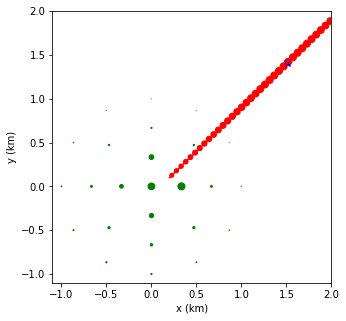

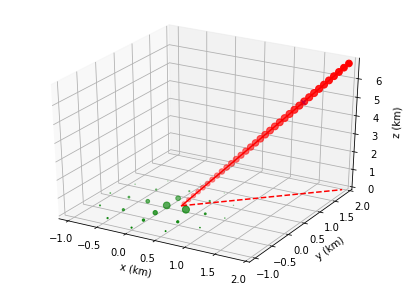

In [12]:
## The event geometry can be shown in either a 2D or 3D plot
#event1.show_geometry2D();
#event1.show_geometry3D();
## An area of 1x1 km2 centered at the origin is shown by default, but can be modified
event1.show_geometry2D(x_min=-1.1, x_max=2., y_min=-1.1, y_max=2.);
event1.show_geometry3D(x_min=-1.1, x_max=2., y_min=-1.1, y_max=2.);

## By default, the size of shower points are proportional to shower size (i.e., columnn N_ch of profile)
## and the size of telescope points are proportional to corresponding signal
## A blue mark indicates the shower maximum
## More options are described in the help
#event1.show_geometry2D?
#event1.show_geometry3D?

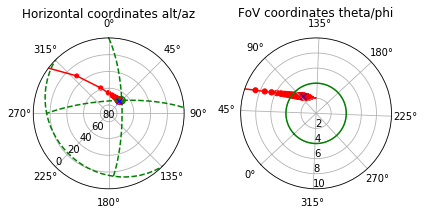

In [13]:
## In addition, the method show_projection is available with similar options
## The telescope index is passed as an argument. If None, the first telescope (tel_index=0) is assumed
event1.show_projection(tel_index=2, max_theta=10.);
#event1.show_projection?

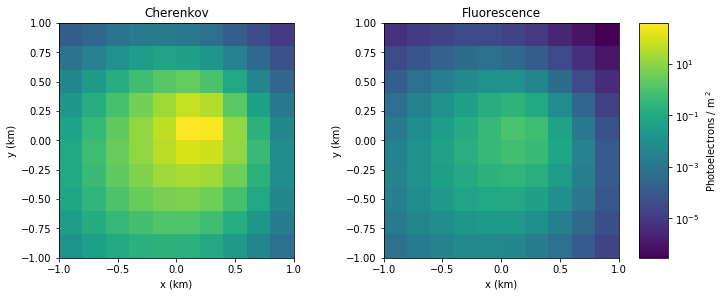

In [14]:
## A show_distribution method is also defined in a similar way as in Shower objects
## but with different default options
shower = tm.Shower(x0=0.2, y0=0.1, theta=20., az=45.)
observatory = tm.Array25(R=1., theta=22., az= 45.)
event1 = tm.Event(observatory, shower) #tel_eff=True by default
## By default, a grid of telescopes identical to the first telescope of the observatory is generated
event1.show_distribution(size_x=2., size_y=2., N_x=10, N_y=10);
## The telescope efficiency can be turned off to obtain the distribution of photons (instead of photoelectrons)
#event1.show_distribution(size_x=2., size_y=0.1, N_x=10, N_y=1, tel_eff=False, wvl_ini=290., wvl_fin=450.);
## Equivalent to
#event2 = tm.Event(observatory, shower, tel_eff=False, wvl_ini=290., wvl_fin=450.)
#event2.show_distribution(x_size=1., y_size=0.1, N_x=10, N_y=1)

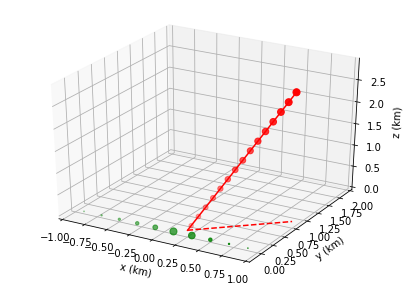

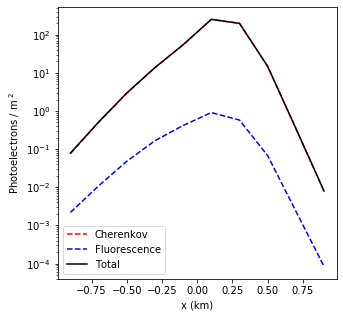

In [15]:
## Alternatively, an existing Grid object can be passed as argument to the Event constructor to generate a GridEvent object,
## which is a special type of event where the observatory is a Grid object and the method show_distribution is overwritten
## so that it has no input parameter
grid = tm.Grid(tel_type="MST", size_x=2., size_y=0.1, theta=22., az= 45., N_x=10, N_y=1)
grid_event = tm.Event(grid, shower)
grid_event.show_geometry3D(y_min=-0.2, y_max=2.);
grid_event.show_distribution();